# Titanic Survival Prediction

In [1]:
# import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as plot
import seaborn as sns

%matplotlib inline

In [2]:
# read the data
titanic_df = pd.read_csv('data/train.csv', index_col=0)

### 1- Data preprocessing

In [3]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_df[['Survived', 'Pclass']]

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3
...,...,...
887,0,2
888,1,1
889,0,3


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
titanic_df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [9]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
# see if there is any patterns for the NaN values for Age
titanic_df[titanic_df.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
6,0,3,male,NaN,0,0,8.4583,Q
18,1,2,male,NaN,0,0,13.0000,S
20,1,3,female,NaN,0,0,7.2250,C
27,0,3,male,NaN,0,0,7.2250,C
29,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
860,0,3,male,NaN,0,0,7.2292,C
864,0,3,female,NaN,8,2,69.5500,S
869,0,3,male,NaN,0,0,9.5000,S


In [11]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
titanic_df['Age'].fillna(value=titanic_df['Age'].mean(), inplace=True)

In [13]:
titanic_df['Embarked'].fillna(value=titanic_df['Embarked'].value_counts().index[0], inplace=True)

### 2- Data exploration and visualization

In [14]:
titanic_df.isnull().sum() # no null values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
# summary of nummeric values
titanic_df.iloc[:, 1:].describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [16]:
# summary of categorical values
titanic_df.iloc[:, 1:].describe(include='O').T

,count,unique,top,freq
Sex,891,2,male,577
Embarked,891,3,S,646


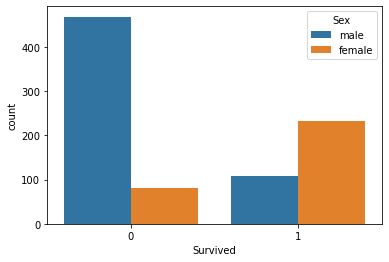

In [17]:
sns.countplot(data=titanic_df, x='Survived', hue='Sex')

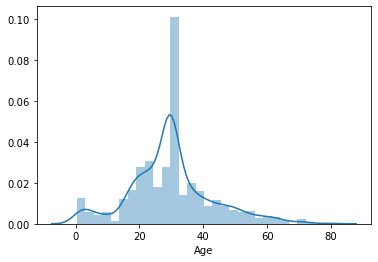

In [18]:
# how Ages distributed
sns.distplot(titanic_df['Age'])

Text(0.5, 1.0, 'Survival vs Age')

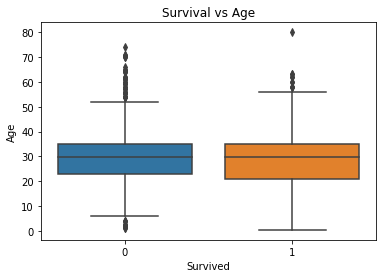

In [19]:
ax = sns.boxplot(data=titanic_df, y='Age', x='Survived')
ax.set_title('Survival vs Age')

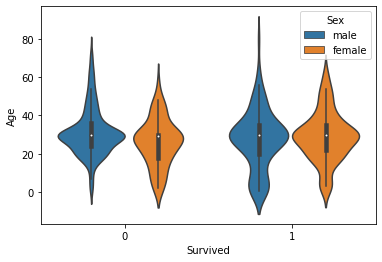

In [20]:
sns.violinplot(data=titanic_df, y='Age', x='Survived', hue='Sex')

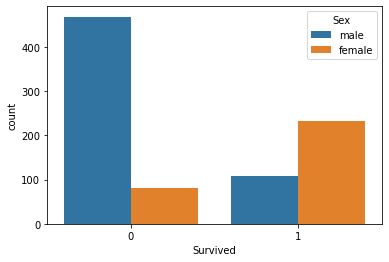

In [21]:
sns.countplot(titanic_df['Survived'], hue=titanic_df['Sex'])

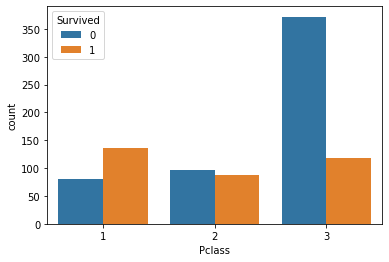

In [22]:
sns.countplot(titanic_df['Pclass'], hue=titanic_df['Survived'])

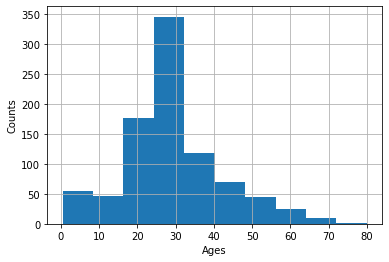

In [23]:
titanic_df['Age'].hist()
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'Number of Survivals according to Parch')

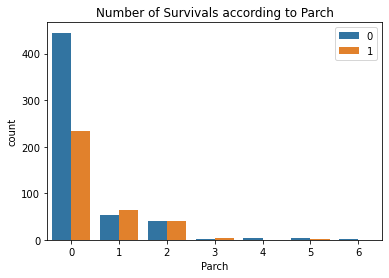

In [24]:
sns.countplot(data=titanic_df, x='Parch', hue='Survived')
plt.legend(loc='upper right')
plt.title('Number of Survivals according to Parch')

In [25]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


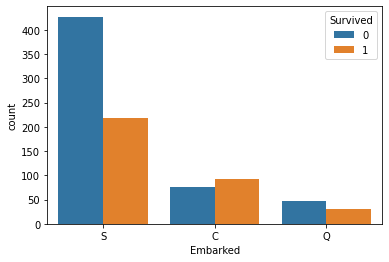

In [26]:
sns.countplot(data=titanic_df, x='Embarked', hue='Survived')

Text(0.5, 1.0, 'Survival vs Fare')

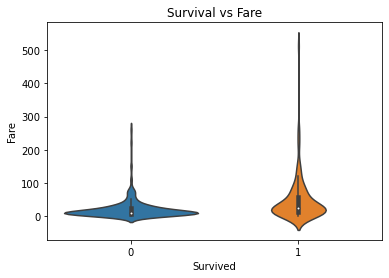

In [27]:
sns.violinplot(data=titanic_df, x='Survived', y='Fare')
plt.title('Survival vs Fare')

In [28]:
# correlation between nummeric features
titanic_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


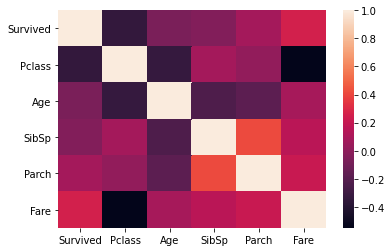

In [29]:
sns.heatmap(titanic_df.corr())

In [30]:
pd.crosstab(
    index=titanic_df['Sex'],
    columns='Count'
)

col_0,Count
Sex,
female,314
male,577


In [31]:
pd.crosstab(
    index=titanic_df['Sex'],
    columns=titanic_df['Survived'],
    margins=True
)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [32]:
pd.crosstab(
    index=titanic_df['Sex'],
    columns=titanic_df['Survived'],
    margins=True,
    normalize='index'
)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [33]:
pd.crosstab(
    index=titanic_df['Sex'],
    columns=titanic_df['Survived'],
    margins=True,
    normalize=True
)

Survived,0,1,All
Sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


In [34]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [35]:
# get dummies to train a model
titanic_df_dummies = pd.get_dummies(titanic_df)

### 3- Building the Model

In [36]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

y = titanic_df_dummies['Survived']
X = titanic_df_dummies.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=10)

In [37]:
# feature scaling
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train, X_test = s.fit_transform(X_train), s.fit_transform(X_test)

In [38]:
# Train the model using logistic regression
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(max_iter=titanic_df.shape[0])
logR.fit(X_train, y_train)

LogisticRegression(max_iter=891)

In [39]:
# predict
y_predicted = logR.predict(X_test)

In [40]:
# confusion metrix to see the accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted, y_test)
cm

array([[125,  21],
       [ 22,  55]], dtype=int64)

In [41]:
print('The model Accuracy is: ')
round(np.divide(cm[0, 0] + cm[1, 1], cm.sum()) * 100, 2)

The model Accuracy is: 


80.72

#### ================ Model Trained =================

# 4- Use the model

In [42]:
# load test data
test_df = pd.read_csv('./data/test.csv', index_col=0)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
# make it ready for the model

In [44]:
test_df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
# missing values
test_df = test_df.apply(
    lambda x: x.fillna(x.mean()) if x.dtype == 'float'\
    else x.fillna(x.value_counts().index[0]),
)

In [45]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
# get dummies
test_df = pd.get_dummies(test_df)


In [47]:
# feature scaling
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
test_df_dummies = s.fit_transform(test_df)
test_df_dummies

array([[ 0.87348191,  0.3349926 , -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       [ 0.87348191,  1.32553003,  0.61699237, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [-0.31581919,  2.51417495, -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       ...,
       [ 0.87348191,  0.65196458, -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191,  0.        , -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191,  0.        ,  0.61699237, ...,  1.76012477,
        -0.35164743, -1.35067551]])

In [48]:
# predict it
result = logR.predict(test_df_dummies)
result

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [49]:
submition = pd.DataFrame({
    "PassengerId": test_df.index,
    "Survived": result
})

In [50]:
submition.to_csv('submition.csv', index=False)

By: Hikmatullah Mohammadi
email: hikmatullah.m80@gmail.com

# Thank you